In [580]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [581]:
import os
import sys

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../scripts')

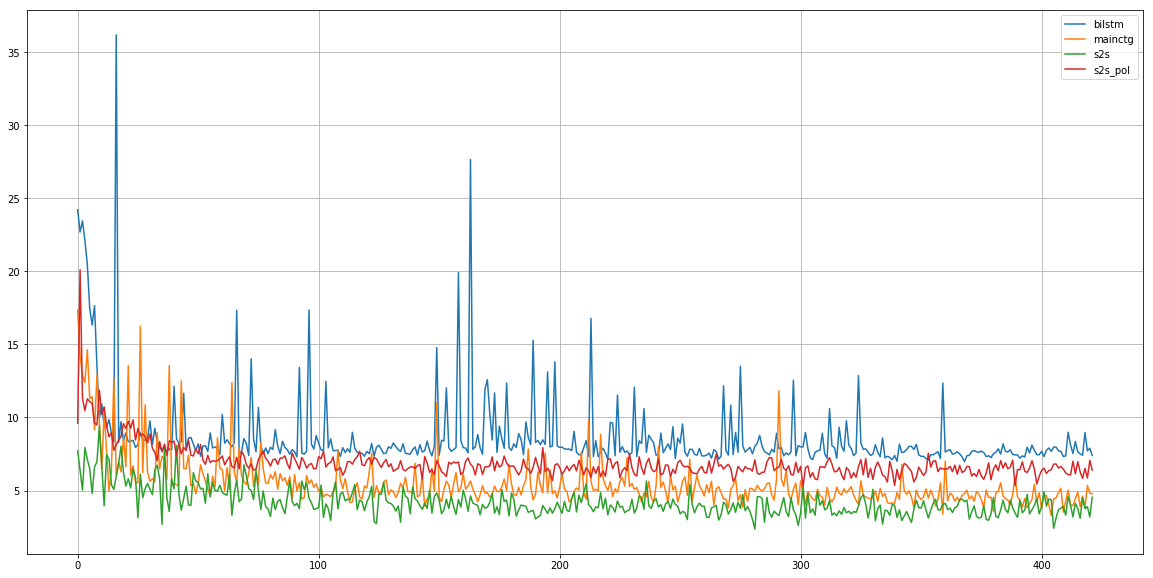

In [582]:
pd.DataFrame(
    {
        'bilstm': pd.read_json('../models/bilstm/log')['main/loss'],
        'mainctg': pd.read_json('../models/bilstm_mainctg/log')['main/loss'],
        'l2norm_v3': pd.read_json('../models/bilstm_l2normalize_v3/log')['main/loss'],
        's2s': pd.read_json('../models/bilstm_s2s_euc/log')['main/loss'],
        's2s_pol': pd.read_json('../models/bilstm_s2s_euc_poly/log')['main/loss'],
    }
)[[
    'bilstm',
    'mainctg',
    #'l2norm_v3',
    's2s',
    's2s_pol',
]].dropna().plot(
    figsize=(20, 10),
    grid=True,
)

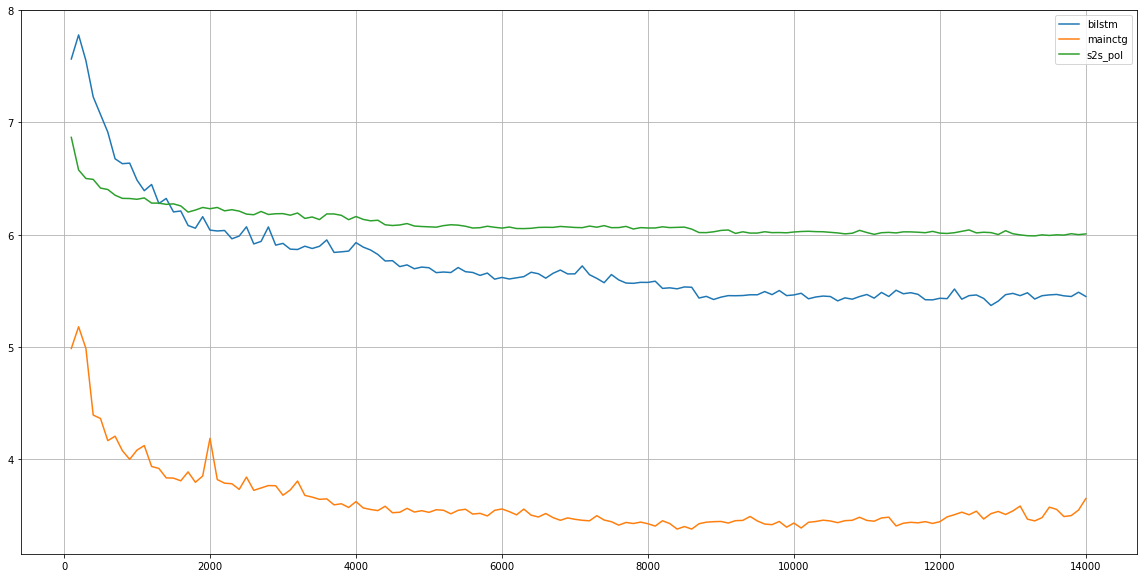

In [584]:
pd.DataFrame(
    {
        'bilstm': pd.read_json('../models/bilstm/log')['valid/main/loss'],
        'mainctg': pd.read_json('../models/bilstm_mainctg/log')['valid/main/loss'],
        's2s_pol': pd.read_json('../models/bilstm_s2s_euc_poly/log')['valid/main/loss'],
    }
)[[
    'bilstm',
    'mainctg',
    's2s_pol',
]].dropna().plot(
    figsize=(20, 10),
    grid=True,
)

bilstm     0.748049
s2s_euc    0.648895
dtype: float64

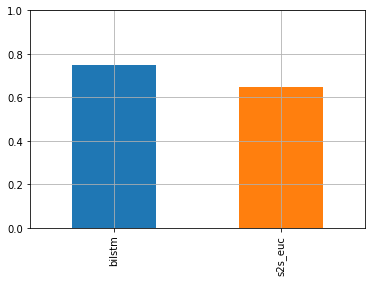

In [326]:
# evaluate by FITB
from fill_in_the_blank import calc_topk_accs


df_fitb = pd.Series({
    'bilstm':\
        calc_topk_accs(
            '../results/fitb/bilstm/iter_000014000.pkl'
        )[0],
    's2s_euc':\
        calc_topk_accs(
            '../results/fitb/bilstm_s2s_euc_poly/iter_000035000.pkl'
        )[0],
})

df_fitb

df_fitb.plot.bar(
    grid=True,
    ylim=(0,1),
)

bilstm     0.888833
s2s_euc    0.862989
dtype: float64

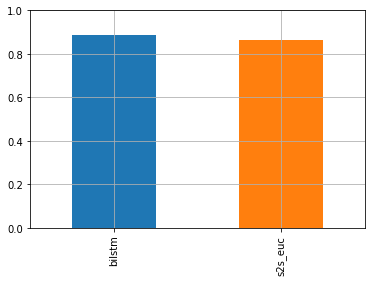

In [327]:
# evaluate by compat_pred
from compatibility_prediction import calc_auc


df_compat_pred = pd.Series({
    'bilstm':\
        calc_auc(
            '../results/compat_pred/bilstm/iter_000014000.pkl'
        ),
    's2s_euc':\
        calc_auc(
            '../results/compat_pred/bilstm_s2s_euc_poly/iter_000035000.pkl'
        ),
})

df_compat_pred

df_compat_pred.plot.bar(
    grid=True,
    ylim=(0,1),
)

In [546]:
# qualitatively evaluation of FITB
import joblib

result_file = '../results/fitb/bilstm/iter_000014000.pkl'
scores = joblib.load(result_file)['scores']
scores.shape
k = 1
decisions = np.any(np.argsort(scores, axis=1)[:,-k:] == 0, axis=1)
wrong_ids_base = np.where(~decisions)[0]
len(wrong_ids_base)

(3076, 4)

775

In [547]:
result_file = '../results/fitb/bilstm_s2s_euc_poly/iter_000035000.pkl'
scores = joblib.load(result_file)['scores']
scores.shape
k = 1
decisions = np.any(np.argsort(scores, axis=1)[:,-k:] == 0, axis=1)
len(decisions)
wrong_ids = np.where(~decisions)[0]
len(wrong_ids)
wrong_ids = np.array(list(set(wrong_ids)-set(wrong_ids_base)))
len(wrong_ids)

(3076, 4)

3076

1080

595

In [548]:
json_file = '../data/shared/MarylandPolyvore/label/fill_in_blank_test.json'
df_ques = pd.read_json(json_file)
df_ques['scores'] = pd.Series(scores.tolist())
df_ques = df_ques.iloc[wrong_ids]
df_ques
it = df_ques.iterrows()

img_dir = '../data/shared/MarylandPolyvore/images'

answers  blank_position  \
2052  [194165098_8, 113632941_8, 189533874_5, 110875...               7   
2053  [139305248_4, 205391270_2, 214394583_5, 120804...               3   
5     [163560873_4, 211633718_2, 176899499_5, 100675...               4   
2056  [201550318_5, 201550318_3, 206741058_1, 185730...               5   
10    [206741058_2, 117614487_4, 165473333_5, 199783...               2   
2059  [170280959_6, 207737344_2, 213943726_6, 109210...               6   
14    [130926593_4, 213752237_8, 215961205_4, 204543...               4   
15    [100445477_2, 213956506_2, 190058983_5, 134261...               2   
2063  [210522570_1, 209102093_1, 117277386_5, 213628...               1   
2068  [214256908_7, 215327132_3, 203758680_1, 212768...               7   
24    [202836170_2, 131554942_3, 171904796_2, 216733...               2   
2075  [216613305_4, 149212393_8, 156282219_5, 214155...               4   
2077  [215976635_1, 118580708_5, 209335629_7, 211022...               1   
35    [190117110_4, 132954547_3, 195558442_7, 211020...               4   
40    [128165435_5, 190431589_4, 211633718_1, 111902...               5   
43    [215076485_3, 216711584_3, 115906400_1, 206073...               3   
2094  [106215904_2, 213561391_7, 208916006_5, 210546...               2   
50    [123298555_7, 203936335_5, 215045298_1, 211339...               7   
53    [173769508_6, 214101600_2, 211903351_4, 187821...               6   
2105  [207333035_5, 112458859_3, 130896948_6, 183656...               5   
2109  [212588326_2, 206497435_6, 168786509_7, 216626...               2   
2111  [215451721_4, 164123584_3, 100077218_2, 216778...               4   
64    [150525587_3, 211260731_6, 216025940_4, 179449...               3   
65    [140487340_5, 190117110_4, 147212160_5, 214603...               5   
2115  [155392434_2, 166550094_3, 213752237_6, 134549...               2   
69    [208913427_5, 194307562_3, 133117681_1, 207586...               5   
2117  [132067168_7, 202014495_5, 120947798_1, 216542...               7   
72    [208918157_4, 176899499_1, 182455195_1, 179356...               4   
2122  [196136260_2, 108988412_1, 136480050_3, 216615...               2   
2127  [111985613_3, 208475993_4, 100002074_5, 214182...               3   
...                                                 ...             ...   
1877  [215237796_4, 100999655_7, 184623986_5, 127441...               4   
1881  [170178579_2, 208046015_3, 172607923_8, 136727...               2   
1884  [213101272_4, 200118669_5, 216608495_1, 179530...               4   
1885  [213668546_6, 165813773_4, 150929541_7, 215729...               6   
1887  [204133684_5, 192689549_2, 129028910_1, 200137...               5   
1890  [134261002_2, 214727714_1, 175417702_6, 177236...               2   
1891  [203571985_4, 206987985_4, 187850258_6, 204550...               4   
1894  [214306315_6, 175784896_2, 216648499_1, 184041...               6   
1899  [167910555_2, 207818571_2, 151913359_7, 185520...               2   
1923  [216205155_3, 213779965_4, 216273968_5, 210992...               3   
1943  [207458099_4, 215492183_1, 214067250_3, 122934...               4   
1956  [128540880_5, 116326024_1, 194754391_4, 215452...               5   
1964  [129234050_1, 166905209_5, 111587072_6, 208921...               1   
1968  [207743159_4, 187020068_6, 148160899_3, 158752...               4   
1982  [120936593_3, 147674239_3, 101455648_2, 146246...               3   
1984  [216946963_4, 216679526_6, 202208707_5, 214029...               4   
1989  [179474941_4, 165813773_8, 208249317_4, 216316...               4   
1995  [204262091_7, 216667668_7, 154482770_5, 190058...               7   
1996  [157389718_3, 194307562_6, 216058382_4, 155892...               3   
2002  [170253804_4, 196087313_1, 103061494_2, 114245...               4   
2009  [172550228_4, 109560851_2, 107105007_7, 213128...               4   
2015  [171518362_2, 206291822_4, 216316318_7, 127777...               2  

In [549]:
def get_imgfile(item_id):
    set_id, index = item_id.split('_')
    return os.path.join(
        img_dir,
        set_id,
        "{}.jpg".format(index))

def show_tiledimg(item_ids, bpos=None, scores=None):
    imgs = [read_shop_img(get_imgfile(item_id))
            for item_id in item_ids]
    
    if scores is not None:
        m = 10
        imgs[0][0, :m, :] = 255
        imgs[0][1, :m, :] = 0
        imgs[0][2, :m, :] = 0
        imgs[0][0, -m:, :] = 255
        imgs[0][1, -m:, :] = 0
        imgs[0][2, -m:, :] = 0
        imgs[0][0, :, :m] = 255
        imgs[0][1, :, :m] = 0
        imgs[0][2, :, :m] = 0
        imgs[0][0, :, -m:] = 255
        imgs[0][1, :, -m:] = 0
        imgs[0][2, :, -m:] = 0
        
        imgs = [
            img
            for img, score in sorted(
                list(zip(imgs, scores)),
                key=lambda img_scr: img_scr[1]
            )[::-1]
        ]
    
    if bpos is not None:
        imgs.insert(bpos-1, np.zeros((3,299,299)))
        
    tiledimg = np.concatenate(imgs, axis=2)    

    return Image.fromarray(np.uint8(tiledimg.transpose(1,2,0)))

from utils import *

15

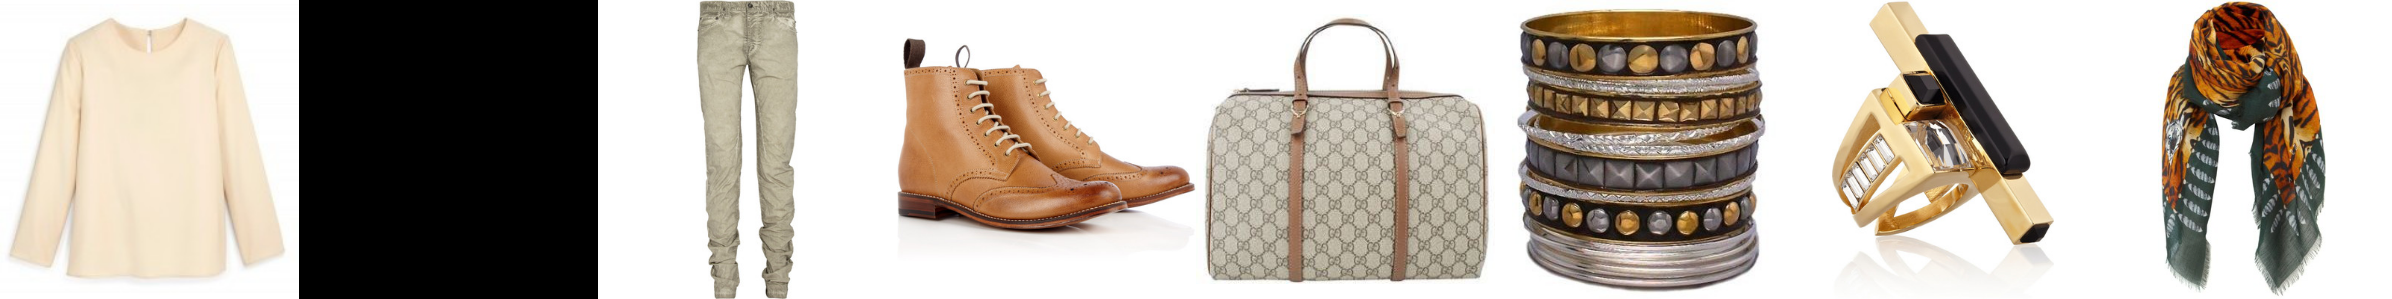

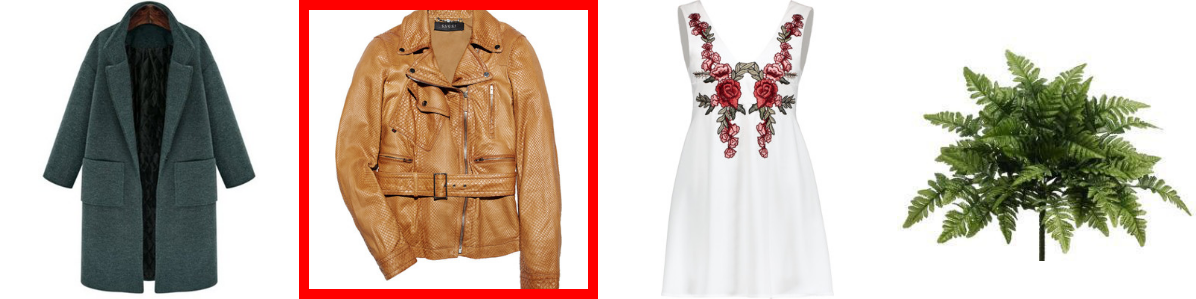

In [557]:
i, (anss, bpos, ques, scores) = next(it)

i
show_tiledimg(ques, bpos=bpos)
show_tiledimg(anss, scores=scores)

In [558]:
# qualitatively evaluate CompatPred

#result_file = '../results/compat_pred/bilstm/iter_000014000.pkl'
result_file = '../results/compat_pred/bilstm_s2s_euc_poly/iter_000035000.pkl'

scores = joblib.load(result_file)['scores']
labels = np.array(joblib.load(result_file)['labels'])

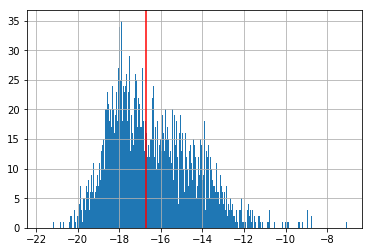

In [559]:
_ = plt.hist(scores, bins=1000)
plt.grid()
th = -16.7
plt.axvline(x=th, color='red')

In [560]:
pred = np.zeros_like(scores)
pred[scores>th] = 1.0
np.mean(pred)

0.50353307

In [561]:
# acc
np.mean(pred == labels)

0.7986150367439231

In [562]:
txt_file = '../data/shared/MarylandPolyvore/label/fashion_compatibility_prediction.txt'
with open(txt_file) as f:
    outfits = [line.rstrip().split(' ')[1:]
     for line in f]

In [563]:
fps = np.array(outfits)[
    np.logical_and(pred!=labels,
                   labels==0.0)].tolist()
len(fps)
fns = np.array(outfits)[
    np.logical_and(pred!=labels,
                   labels==1.0)].tolist()
len(fns)

tns = np.array(outfits)[
    np.logical_and(pred==labels,
                   labels==0.0)].tolist()
len(tns)
tps = np.array(outfits)[
    np.logical_and(pred==labels,
                   labels==1.0)].tolist()
len(tps)


956

469

3044

2607

In [569]:
n = 5
it = iter(range(n,1000, n))
pool = fps

15

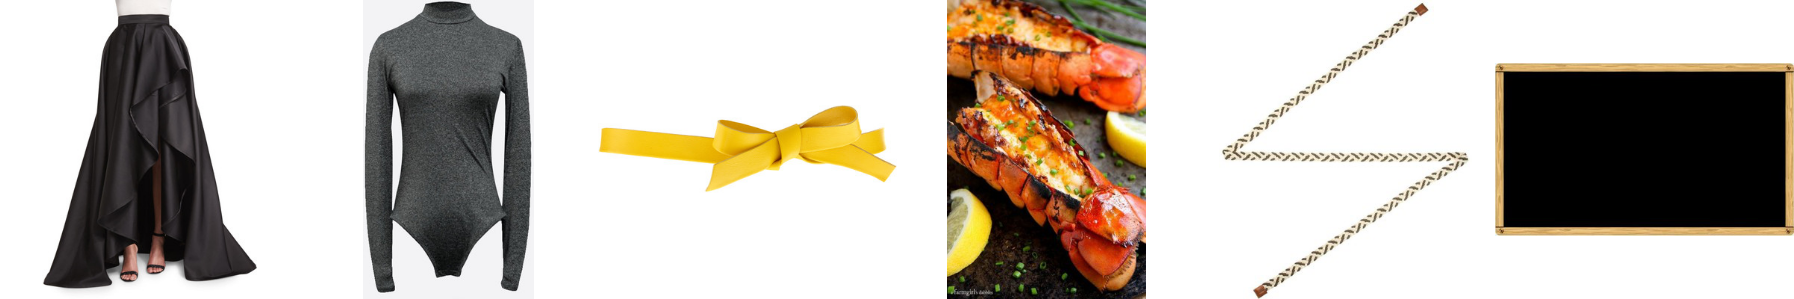

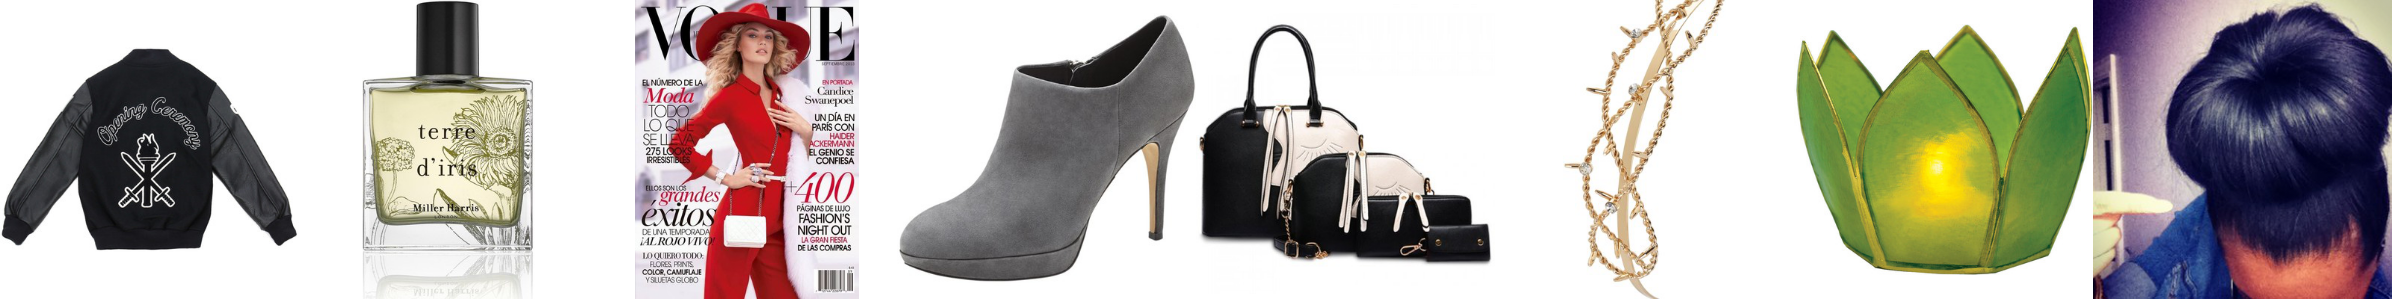

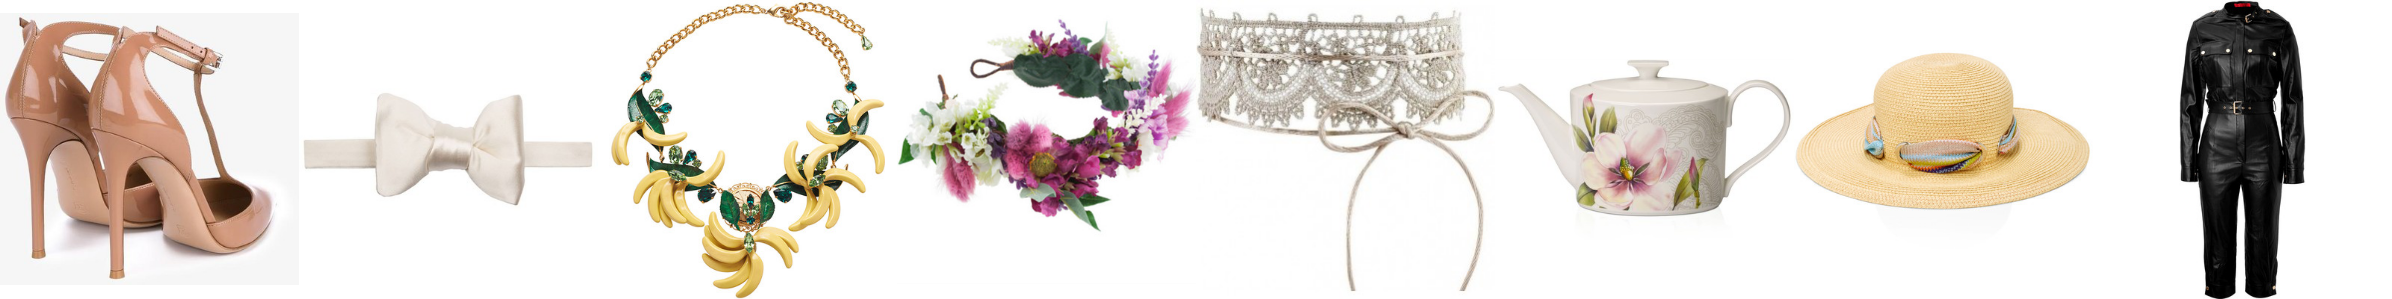

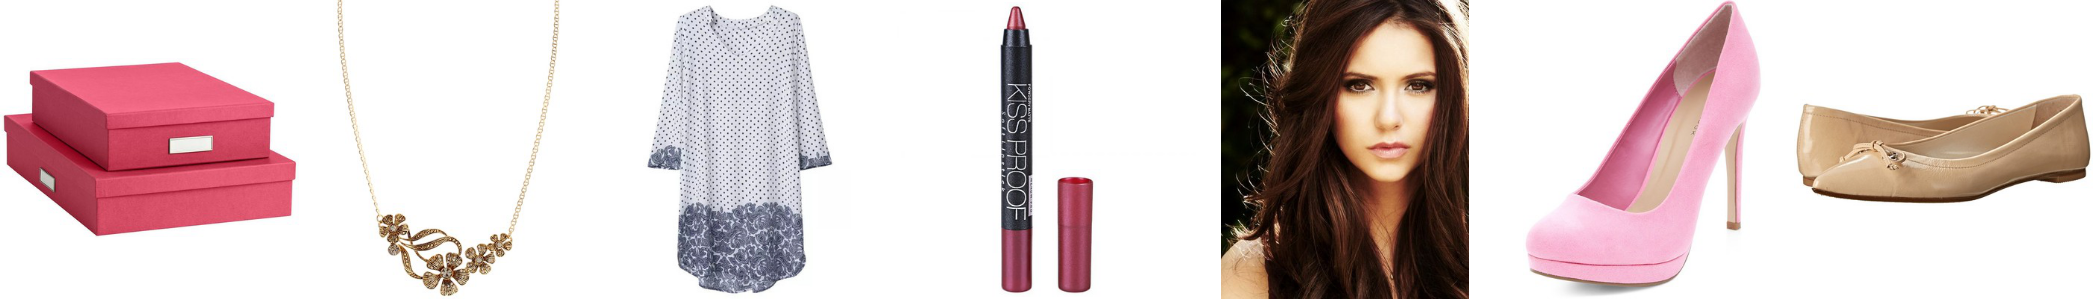

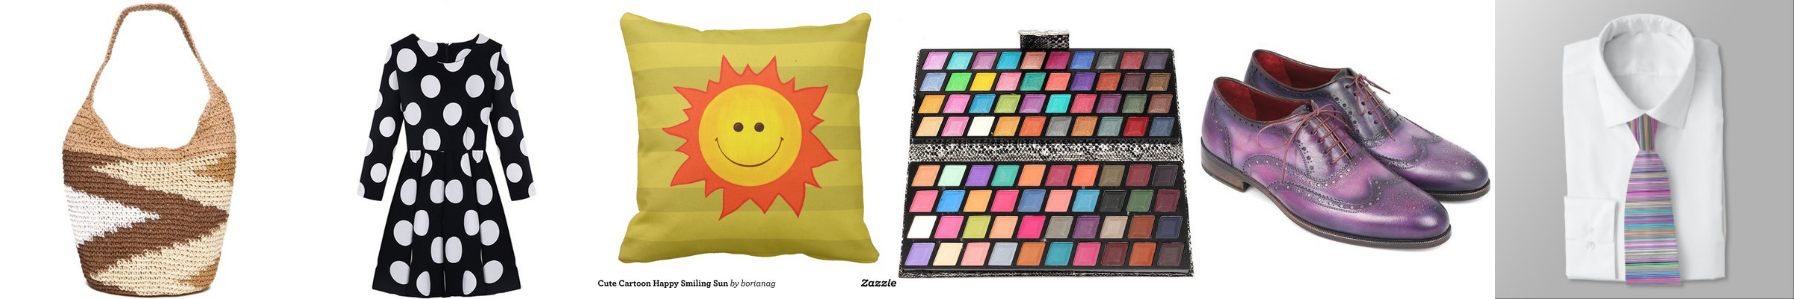

In [572]:
i_end = next(it)
i_end

for outfit in pool[i_end-n:i_end]:
    show_tiledimg(outfit)